# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import math 

In [2]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
# Q1
print(dataframe.describe())
q_norm = dataframe['normal'].quantile([0.25,0.5,0.75])
q_bin  = dataframe['binomial'].quantile([0.25,0.5,0.75])
resp1 = (q_norm-q_bin).values
resp1 = np.around(resp1,decimals=3)
print(resp1)

normal      binomial
count  10000.000000  10000.000000
mean      19.991456     20.097000
std        4.013850      4.041191
min        4.310399      6.000000
25%       17.309638     17.000000
50%       19.989620     20.000000
75%       22.684324     23.000000
max       35.704951     36.000000
[ 0.31  -0.01  -0.316]


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [5]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return tuple(resp1)
    pass

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

0.687


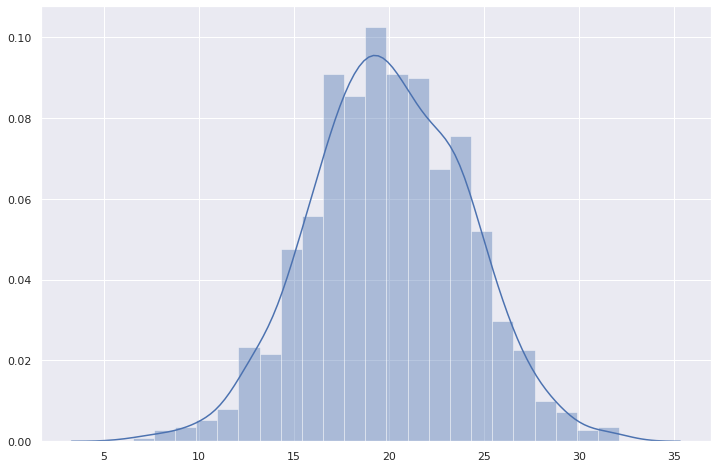

In [6]:
# Q2
media_normal = dataframe.normal.mean()
std_normal  = dataframe.binomial.std()
# Definindo a normal , loc = média , scale = desvio padrão amostral, tamanho = 10000
func_norm = sct.norm.rvs(loc=media_normal,scale= std_normal,size=1000)
sns.distplot(func_norm)

ecdf = ECDF(dataframe.normal)
cdf_normal_1 = media_normal + std_normal
cdf_normal_2 = media_normal - std_normal
resp2 = np.round(ecdf(cdf_normal_1) - ecdf(cdf_normal_2), 3)
print(resp2)


In [6]:
def q2():
    # Retorne aqui o resultado da questão 2.
    # 0.687
    return float(0.684)
    pass

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [10]:
# Q3
# media_normal = dataframe.normal.mean()
# std_normal  = dataframe.binomial.std()
m_binom = dataframe.binomial.mean()
v_binom = dataframe.binomial.var()
m_norm = dataframe.normal.mean()
v_norm = dataframe.normal.var()
resp3 = dif_mv = (np.round(m_binom - m_norm, 3), np.round(v_binom - v_norm, 3))
resp3 = tuple(resp3)
# print(resp3)
# print(type(resp3))

(0.106, 0.22)
<class 'tuple'>


In [7]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return tuple(resp3)
 
    pass

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [3]:

stars = pd.read_csv("pulsar_stars.csv")
stars.head(10)
# stars.rename({old_name: new_name
#               for (old_name, new_name)
#               in zip(stars.columns,
#                      ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
#              },
#              axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [5]:
# Sua análise da parte 2 começa aqui.
target_false = stars[stars['target'] == 0]
target_false.shape
target_false = target_false['mean_profile']
false_pulsar_mean_profile_standardized = (target_false - target_false.mean()) / target_false.std()
quantis4 = [0.80, 0.90, 0.95]
arraypff = []

for x in quantis4:
    pff = sct.norm.ppf(x, loc=false_pulsar_mean_profile_standardized.mean(), scale=false_pulsar_mean_profile_standardized.std())
    arraypff.append(pff)
arraypff

arrayres4 = []
ecdf = ECDF(false_pulsar_mean_profile_standardized)
for y in arraypff:
    cdf_pff_unico = ecdf(y)
    cdf_pff_unico = cdf_pff_unico.round(3)
    arrayres4.append(cdf_pff_unico)
tuple(arrayres4)

(0.806, 0.911, 0.959)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [10]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return tuple(arrayres4)
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [9]:
q_star_standard = false_pulsar_mean_profile_standardized.quantile([0.25,0.5,0.75]).to_numpy()
q_star_standard[0]
quantis_dn = [0.25,0.5,0.75]
q_normal_distribution = []

for x in quantis_dn:
    quanti_norm = sct.norm.ppf(x, loc=0, scale=1)
    q_normal_distribution.append(quanti_norm)
q_normal_distribution
res5 = (round(q_star_standard[0] - q_normal_distribution[0], 3), round(q_star_standard[1] - q_normal_distribution[1], 3), round(q_star_standard[2] - q_normal_distribution[2], 3))
res5

(0.027, 0.04, -0.004)

In [11]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return tuple(res5)
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.